In [13]:
def readGenome(filename):
    genome =''
    with open(filename,'r') as f:
        for line in f:
            if not line[0] == '>':
                genome +=line.rstrip()
    return genome
g = readGenome('lambda_virus.fa')
len(g)

48502

In [14]:
def reverseComplement(s):
    complement = {'A':'T','T':'A','C':'G','G':'C','N':'N'}
    reverse = ''
    for i in s:
        reverse = complement[i]+ reverse
    return reverse

def naiveMatch(pattern, text):
    matches =[]
    for i in range(len(text)-len(pattern)+1):
        match = True
        for j in range(len(pattern)):
            if not pattern[j]== text[i+j]:
                match = False
                break
        if match:
            matches.append(i)
    return matches

In [15]:
read = 'AGTCGA'
readR = reverseComplement(read)

matches = naiveMatch(read,g)
matches.extend(naiveMatch(readR,g))
print(matches)
print(min(matches))

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]
450


In [26]:
def naive_2mm(pattern, text):
    matches =[]
    for i in range(len(text)-len(pattern)+1):
        errors=0
            
        for j in range(len(pattern)):
            if not pattern[j]== text[i+j]:
                errors +=1
        if errors<3:
            matches.append(i)
    return matches

In [27]:
p= 'GGCGCGGTGGCTCACGCCTGTAAT'
t = readGenome('chr1.GRCh38.excerpt.fasta')
print(len(naive_2mm(p,t)))


19


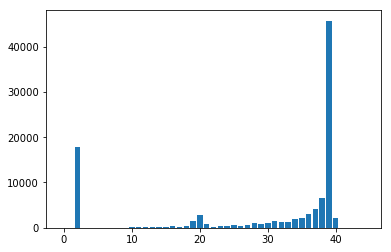

In [51]:
def phredQ(q):
    return ord(q) - 33

def readFastq(filename):
    sequenses = []
    qualities = []
    with open(filename) as f:
        while True :
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qual = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequenses.append(seq)
            qualities.append(qual)
    return sequenses, qualities
seqs , quals = readFastq('ERR037900_1.first1000.fastq')

def createHist(qualities):
    hists = [0] * 45
    for qual in qualities:
        for phred in qual:
            q = phredQ(phred)
            hists[q] += 1
    return hists
h = createHist(quals)
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.show()


In [52]:
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0]


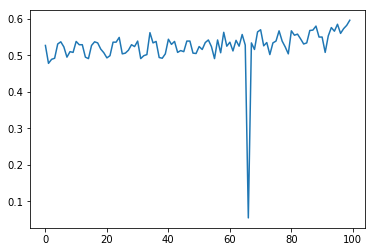

In [54]:
def findGCByPos(reads):
    gc = [0] * 100
    total = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'G' or read[i] == 'C':
                gc[i] +=1
            total[i] +=1
    for i in range(len(gc)):
        if total[i]>0:
            gc[i]/=float(total[i])
    return gc

gc = findGCByPos(seqs)

plt.plot(range(len(gc)),gc)
plt.show()

In [58]:
print(gc)
print(gc.index(min(gc)))

[0.527, 0.478, 0.489, 0.492, 0.531, 0.537, 0.523, 0.495, 0.51, 0.508, 0.538, 0.529, 0.529, 0.495, 0.491, 0.527, 0.537, 0.534, 0.517, 0.507, 0.493, 0.499, 0.536, 0.536, 0.549, 0.504, 0.506, 0.514, 0.529, 0.524, 0.539, 0.491, 0.499, 0.502, 0.562, 0.534, 0.538, 0.494, 0.492, 0.504, 0.544, 0.53, 0.538, 0.508, 0.513, 0.51, 0.539, 0.539, 0.506, 0.505, 0.524, 0.516, 0.535, 0.542, 0.524, 0.491, 0.542, 0.507, 0.563, 0.525, 0.536, 0.512, 0.541, 0.525, 0.557, 0.528, 0.055, 0.534, 0.516, 0.564, 0.57, 0.526, 0.535, 0.502, 0.534, 0.539, 0.567, 0.539, 0.523, 0.504, 0.567, 0.555, 0.558, 0.545, 0.531, 0.534, 0.568, 0.569, 0.58, 0.55, 0.55, 0.508, 0.553, 0.576, 0.566, 0.585, 0.56, 0.573, 0.582, 0.596]
66
